In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
M = 10
N = 1200
# t = np.linspace(0,1,N)
t = np.arange(0,1,1/N)

In [3]:
from mpmath import *
mp.dps = 15; mp.pretty = True

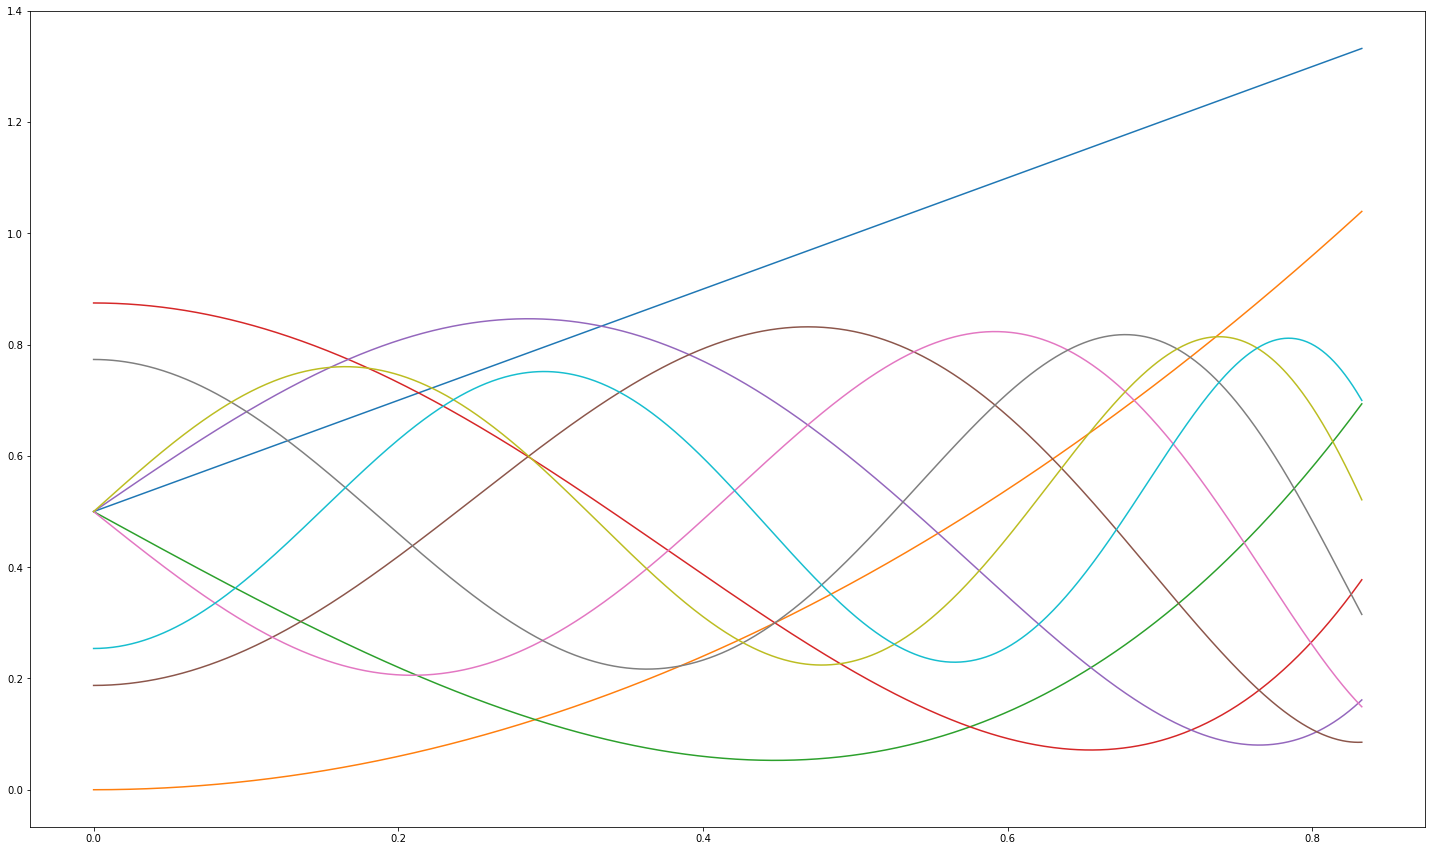

In [4]:
f = ['f{}'.format(i) for i in range(0, M)]
x = ['x{}'.format(i) for i in range(0, M)]

for i in range(10):
    f[i]= lambda x: legendre(i+1,x)
    x[i] = [f[i](n) + 0.5 for n in t]

N = 1000

plt.figure(figsize=(25,15))
    
for i in range(10):
    plt.plot(t[:N],x[i][:N])

plt.show()

In [5]:
t = t[:N]

X = pd.DataFrame([x[0],x[1],x[2],x[3],x[4],x[6],x[6],x[7],x[8],x[9]]).iloc[:,:N]

Noise = pd.DataFrame(stats.norm.rvs(0,0.25,size=(10,N),random_state=6))

X = X + Noise

Y = X.transpose()

In [6]:
V = manifold.TSNE(n_components=2, random_state=6, init='pca').fit_transform(Y)

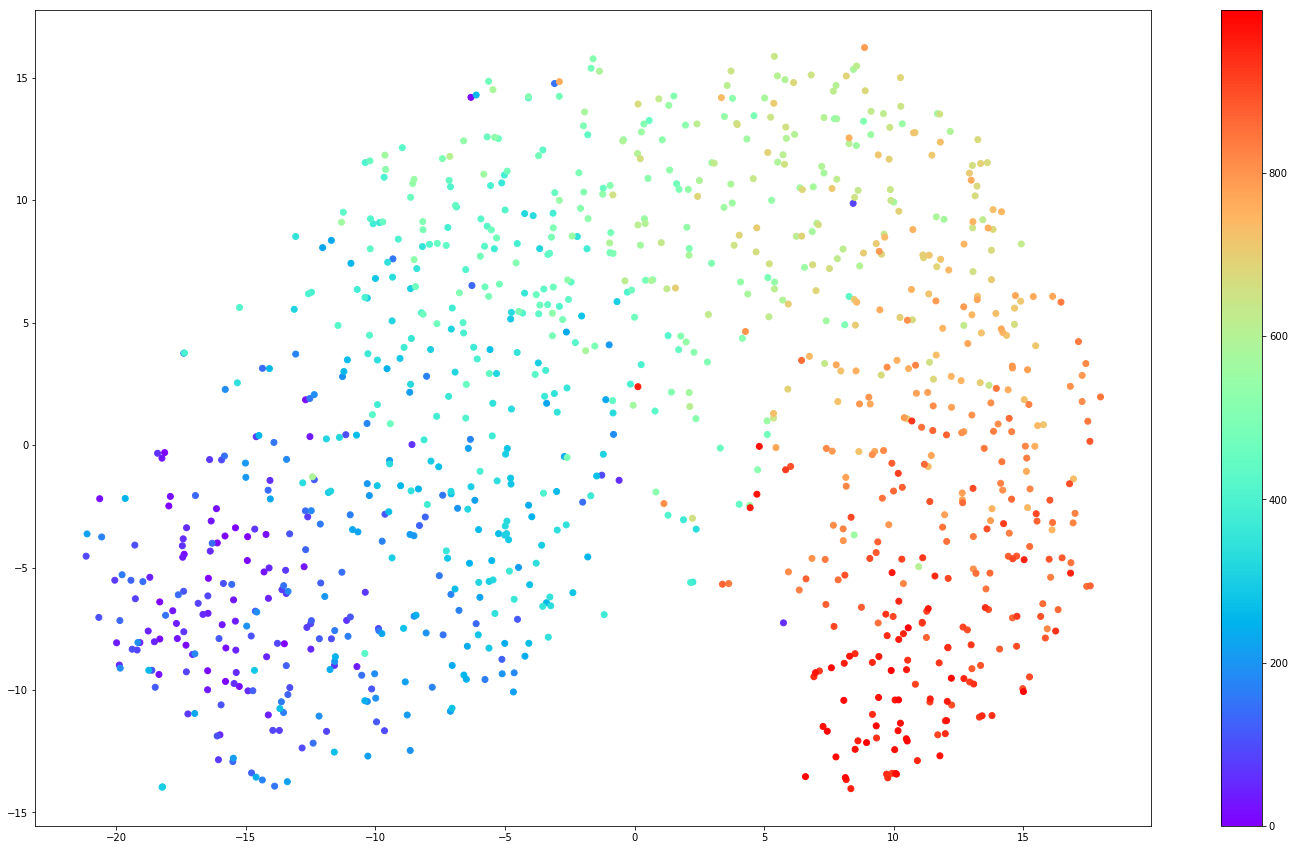

In [7]:
fig = plt.figure(figsize=(25,15))
plt.scatter(V[:,0],V[:,1], c = list(range(N)),cmap='rainbow')
plt.colorbar()
plt.show()

# algorithm

In [8]:
from SCOUT import *

Dimension reduction with t-stochastic neighbor embedding(tSNE).



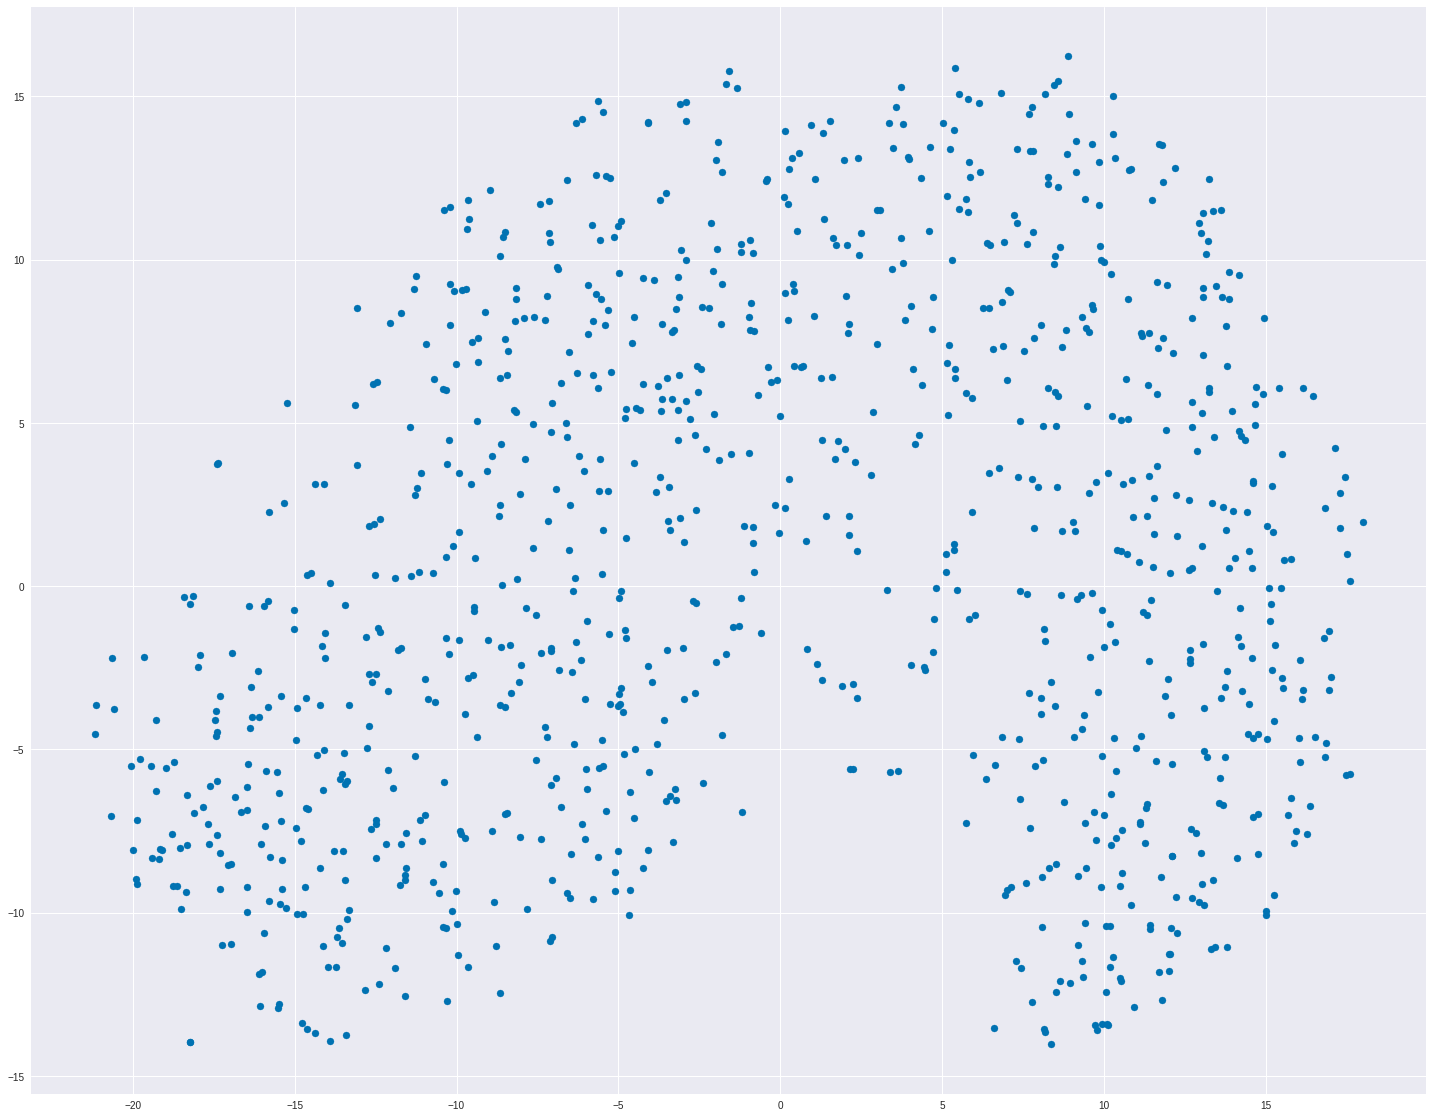

In [9]:
Z = SCOUT(Y)
V = Z.dim_down(method='tsne',rand_seed=6)
Z.plotD(V)

In [10]:
help(Z.clustering)

Help on method clustering in module SCOUT:

clustering(V, method='kmeans', nclust=None, cov='tied', rand_seed=6, traj_branch=True) method of SCOUT.SCOUT instance
    :param V: the data for clustering.
    :param method: selected method of clustering.
    :param nclust: number of clusters.
    :param cov: only used for method GMM. Covariance type contains 'full','tied','diag',and 'spherical'.
    :param rand_seed: seed used by the random number generator.
    :return: centroids and labels of the data.



Clustering with Gaussian Mixture
branches:
 [[0, 3, 2, 1]]


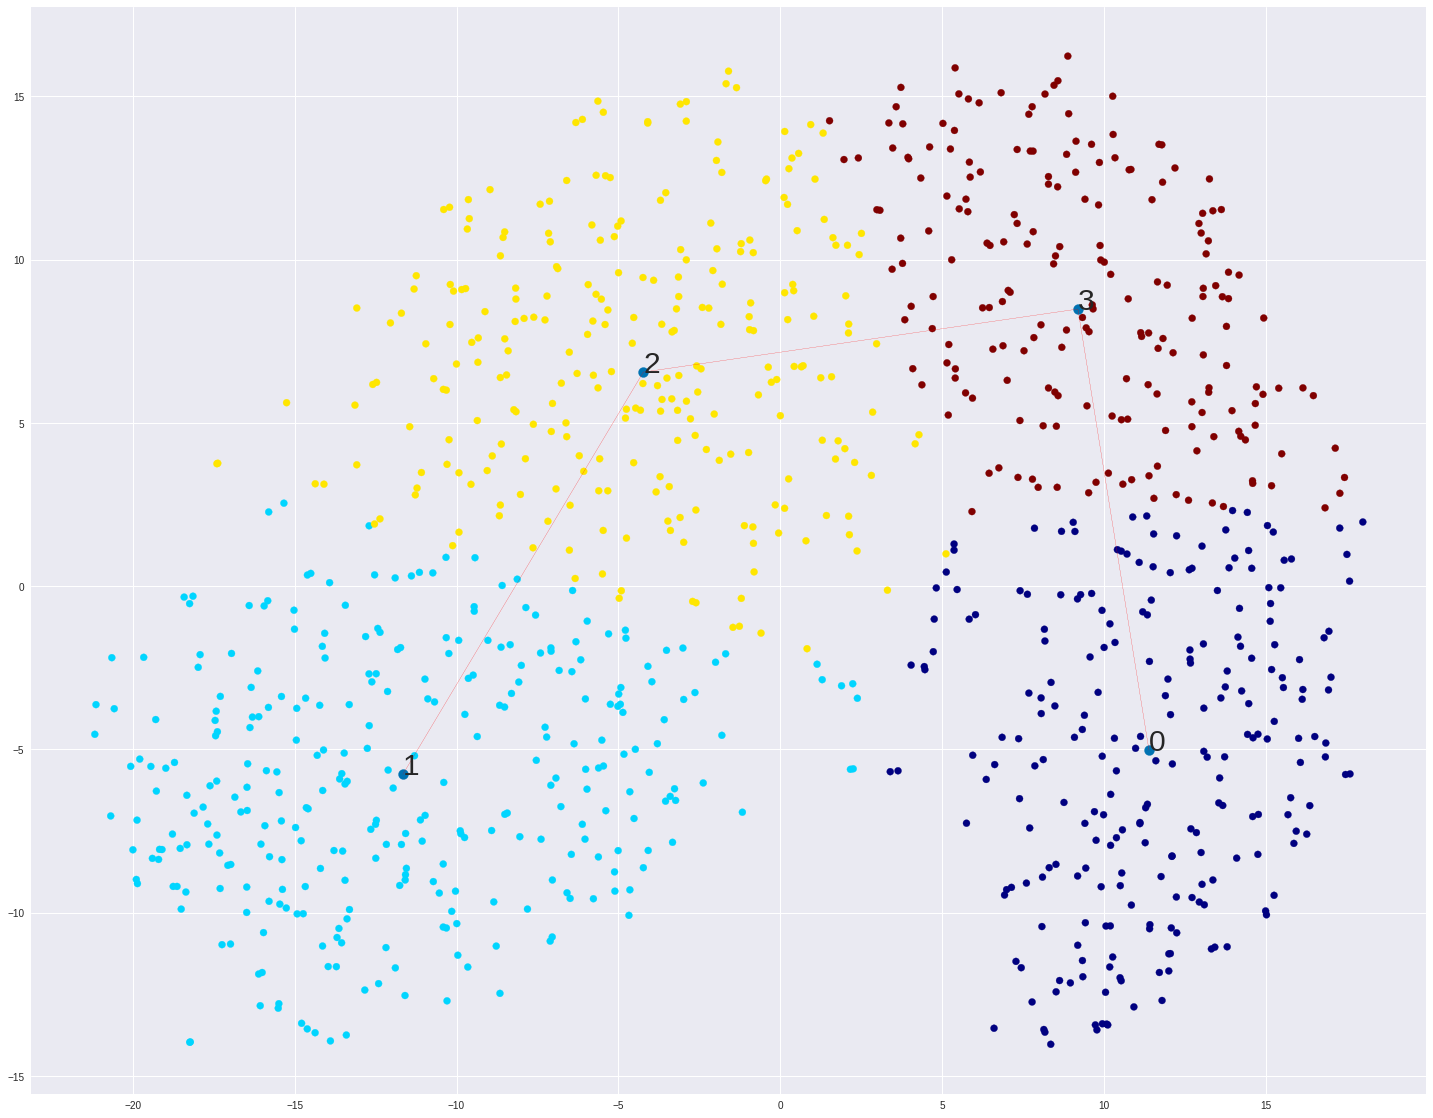

In [11]:
centroids,labels = Z.clustering(V,method='gmm',cov='full',nclust=4)
# Tcsr,edges = Z.get_MST()
Z.plotD(V)

In [12]:
branches = Z.traj_centroids()
branch = branches[0][::-1]
branches = [branch]
print(branches)

branches:
 [[0, 3, 2, 1]]
[[1, 2, 3, 0]]


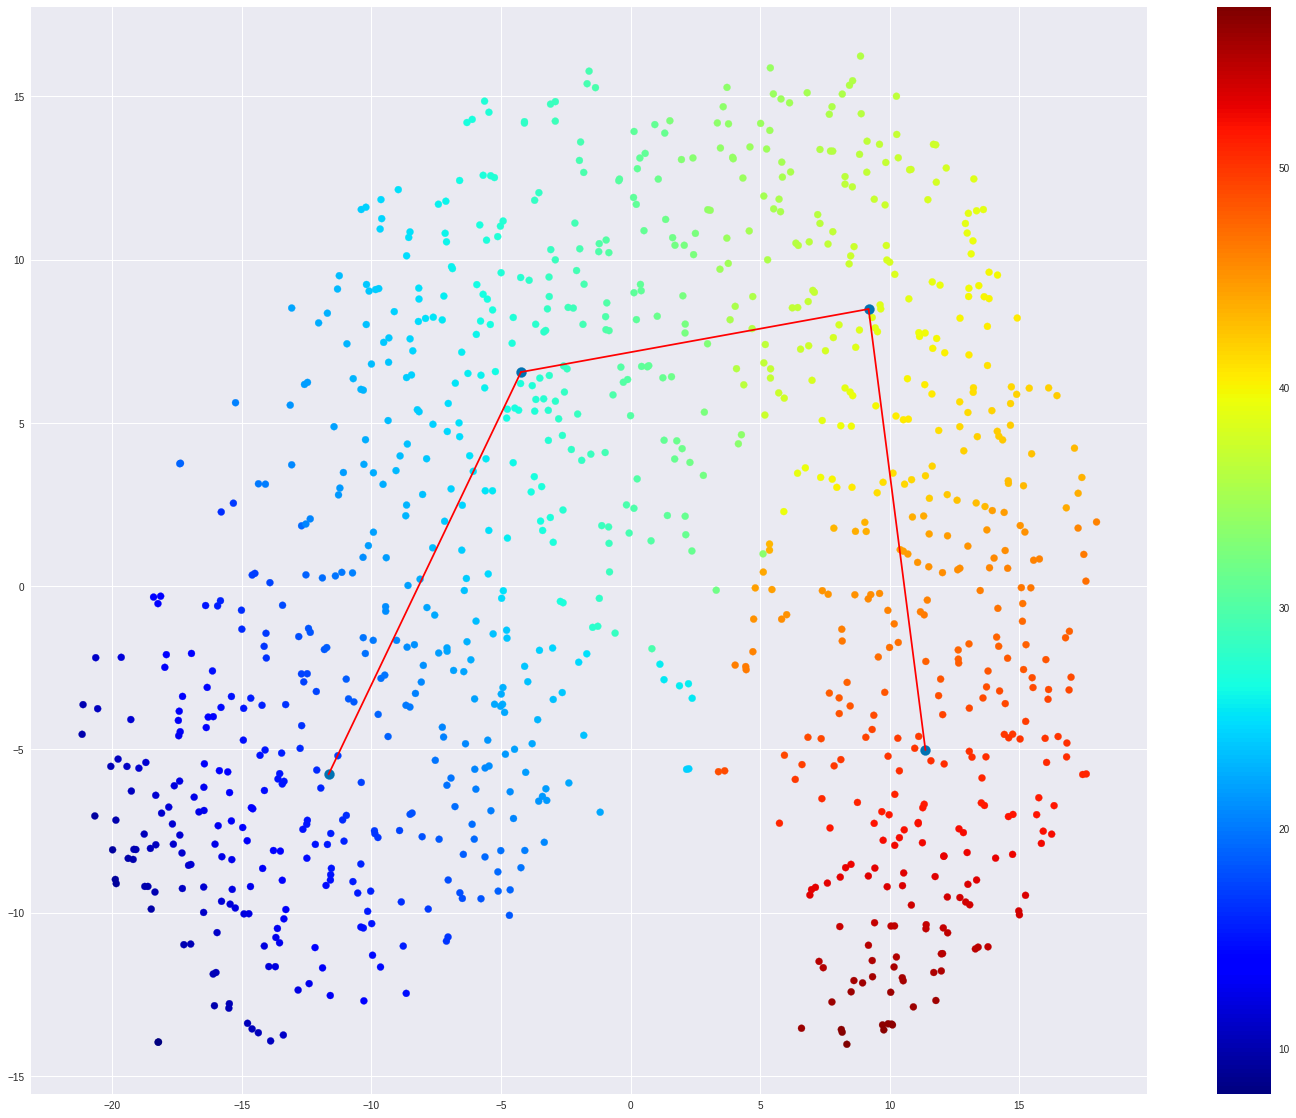

In [13]:
cell_scores,cell_order= Z.get_ordering(V,branches,method = 'wd',delta=1)

Z.plotT(V,cell_scores,dims=[0,1])

In [14]:
order = cell_order[0]
Xorder0 = X.reindex_axis(order,axis=1)

oder_real= np.linspace(0,N-1,N)
cor = stats.pearsonr(order,oder_real)[0]
cor

0.94880296880296877

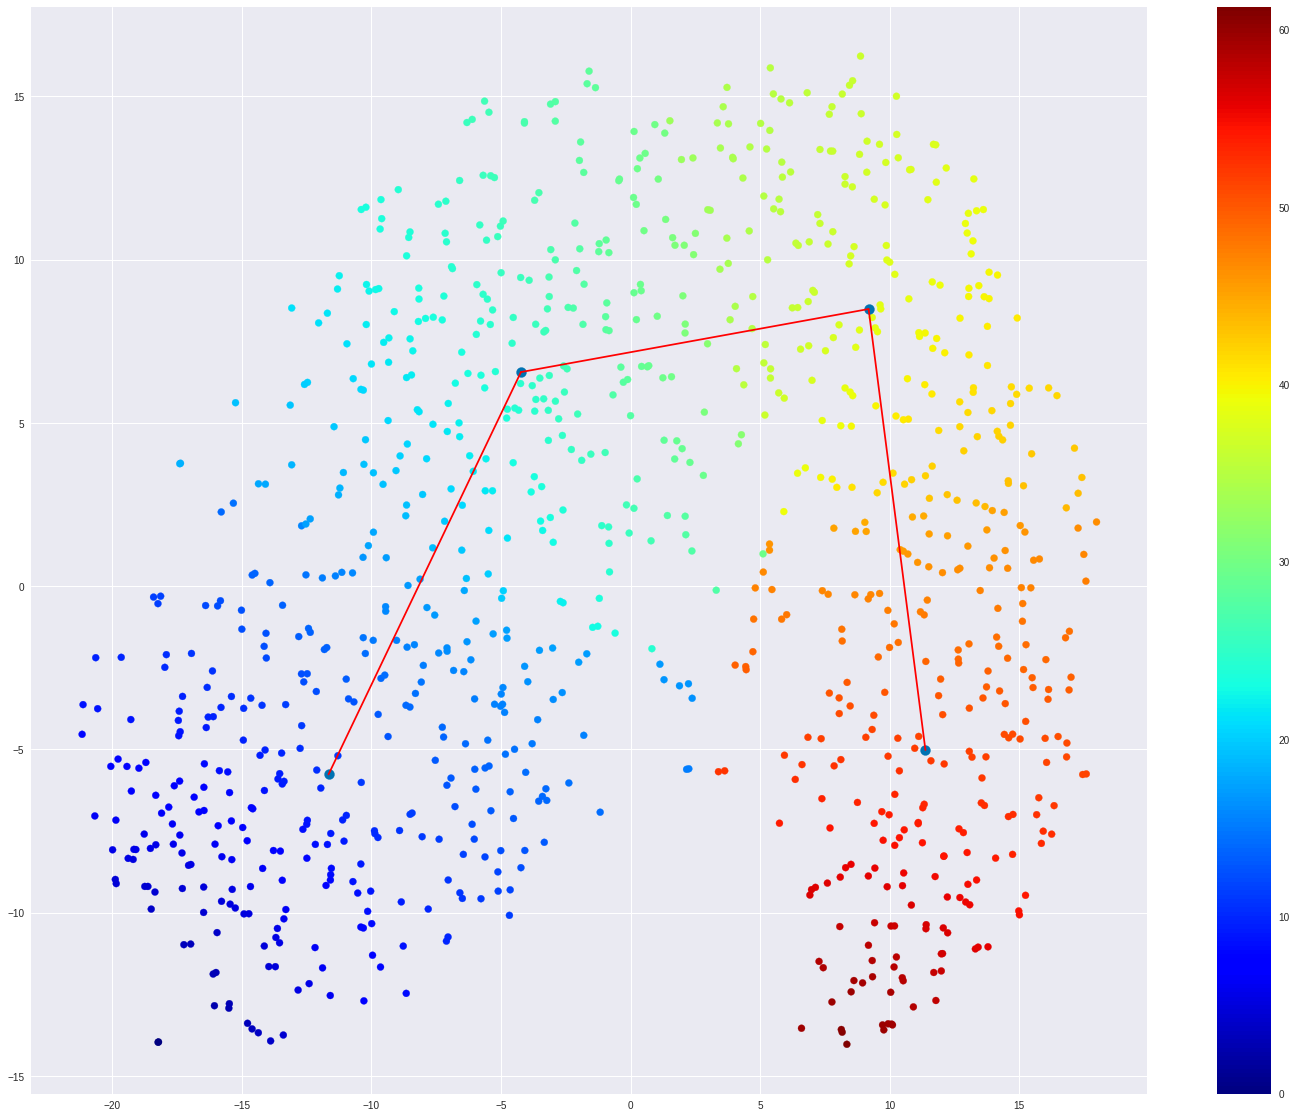

In [15]:
cell_scores,cell_order = Z.get_ordering(V,branches,method = 'ap')
Z.plotT(V,cell_scores)

In [16]:
order = cell_order[0]
Xorder1 = X.reindex_axis(order,axis=1)

order_real= np.linspace(0,N-1,N)
cor = stats.pearsonr(order,order_real)[0]
cor

0.94733462333462337

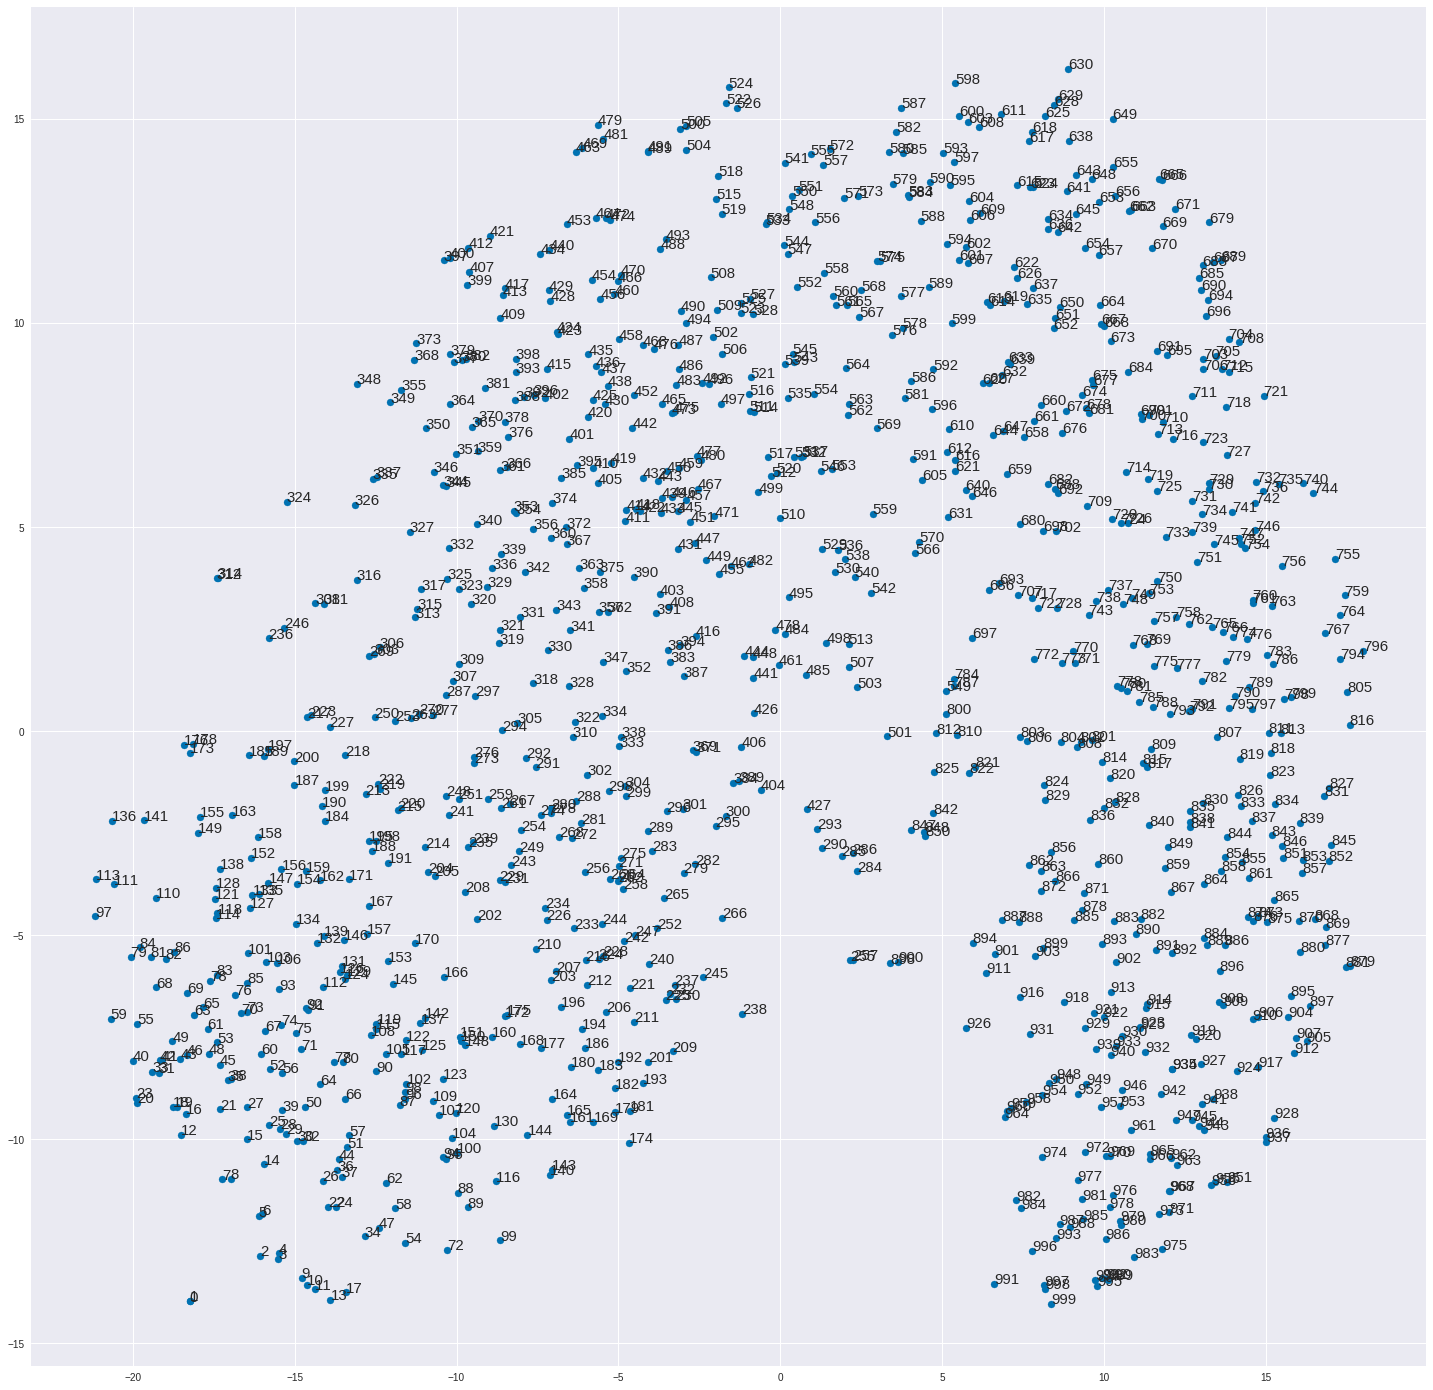

In [17]:
fig = plt.figure(figsize=(25,25))
plt.scatter(V[:,0],V[:,1])

orders = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])

for ind,ord in enumerate(orders):
        plt.annotate(ind,xy=(V[:,0][ord],V[:,1][ord]),fontsize=15)
    
plt.show()

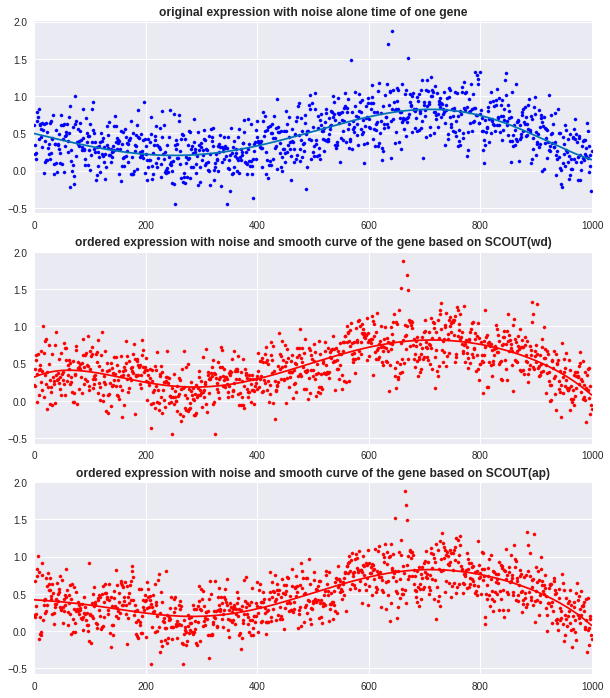

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, WhiteKernel

fig = plt.figure(figsize=(10,12))

plt.subplot(311)
plt.scatter(np.arange(0,1000,1),X.iloc[6,:],c='blue',s=10)
plt.plot(np.arange(0,1000,1),x[6][:N])
plt.xlim((0,1000))
plt.title("original expression with noise alone time of one gene",fontsize=12,fontweight='bold')

plt.subplot(312)
plt.scatter(np.arange(0,1000,1), Xorder0.iloc[6,:].values,c='red',s=10)
gp = GaussianProcessRegressor().fit(t.reshape(-1,1),Xorder0.iloc[6,:].values).predict(t.reshape(-1,1))
plt.plot(np.arange(0,1000,1),gp,c='red')
plt.xlim((0,1000))
plt.title("ordered expression with noise and smooth curve of the gene based on SCOUT(wd)",fontsize=12,fontweight='bold')

plt.subplot(313)
Xorder1 = X.reindex_axis(order,axis=1)
plt.scatter(np.arange(0,1000,1), Xorder1.iloc[6,:].values,c='red',s=10)
gp = GaussianProcessRegressor().fit(t.reshape(-1,1),Xorder1.iloc[6,:].values).predict(t.reshape(-1,1))
plt.plot(np.arange(0,1000,1),gp,c='red')
plt.xlim((0,1000))
plt.title("ordered expression with noise and smooth curve of the gene based on SCOUT(ap)",fontsize=12,fontweight='bold')

# plt.savefig('./gene_smooth.eps', format='eps', dpi=1000)
plt.show()